    Issues
    
    Diffusion model does not return potentially NSFW images. BUT these images are actually 
    https://github.com/CompVis/stable-diffusion/issues/239

In [1]:
from diffusers import StableDiffusionPipeline
import torch
import json
import os
import shutil

In [8]:
# !pip install diffusers
# !pip install accelerate #accelerate-0.24.1

In [2]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [3]:
pipe.safety_checker = None
pipe.requires_safety_checker = False

### Test text to image example

  0%|          | 0/50 [00:00<?, ?it/s]

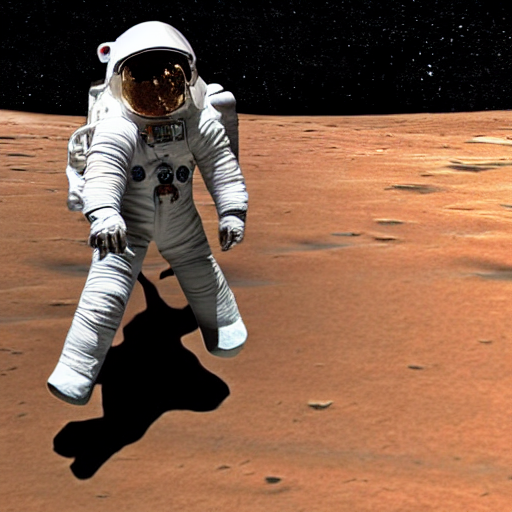

In [4]:
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]  
image

## Create a set of images for short stories and store them

In [7]:
f = open('../datasets/childrenBook/chatGPTOutput_2.txt', 'r')
data = json.load(f)

In [8]:
data['0']

{'0': {'org': 'every year, the evil protectorate offers a baby to the evil witch in the forest to ensure their village’s safety',
  'img_prompt': 'Offering basket. in surrealism style'},
 '1': {'org': 'yet, unknown to them, the witch is xan, the plump and knowledgeable protector of the babies that she takes to the neighbouring village to be raised as special children, fed on starlight and destined to do wonderful things',
  'img_prompt': 'Village. in surrealism style'},
 '2': {'org': 'yet, one day, xan feeds one baby the moon by mistake and fills her with a huge amount of magic',
  'img_prompt': 'Baby bottle. in surrealism style'},
 '3': {'org': 'a dangerous amount, as it turns out',
  'img_prompt': 'Warning sign. in surrealism style'},
 '4': {'org': 'but nothing is straightforward, and when luna turns 13, everything will change',
  'img_prompt': 'Birthday calendar. in surrealism style'}}

In [9]:
if os.path.exists("../datasets/childrenBook/images2/"):
    shutil.rmtree("../datasets/childrenBook/images2/")    
os.makedirs("../datasets/childrenBook/images2/")

if os.path.exists("../datasets/childrenBook/labels2/"):
    shutil.rmtree("../datasets/childrenBook/labels2/")    
os.makedirs("../datasets/childrenBook/labels2/")

In [10]:
for story in data:
    s_name = "story_"+story

    print(f"Processing {s_name}...")
    if os.path.exists(f"../datasets/childrenBook/images2/{s_name}"):
        shutil.rmtree(f"../datasets/childrenBook/images2/{s_name}")
    os.makedirs(f"../datasets/childrenBook/images2/{s_name}")

    if os.path.exists(f"../datasets/childrenBook/labels2/{s_name}"):
        shutil.rmtree(f"../datasets/childrenBook/labels2/{s_name}")
    os.makedirs(f"../datasets/childrenBook/labels2/{s_name}")
    
    for sent in data[story]:
        # generate images and save
        img_prompt = data[story][sent]['img_prompt']
        print(f"Generating for: {img_prompt}")
        img = pipe(img_prompt).images[0]
        img.save(f'../datasets/childrenBook/images2/{s_name}/{sent}.jpg')
        
        # save label
        with open(f'../datasets/childrenBook/labels2/{s_name}/{sent}.txt',"w") as f:
            f.write(data[story][sent]['org'])
            f.close()

Processing story_0...
Generating for: Offering basket. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Village. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Baby bottle. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Warning sign. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Birthday calendar. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_1...
Generating for: Journal with a picture of Bennett at the new school.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Empty desk with a note from Bennett pretending not to know Anna.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Medallion that Bennett holds when saving Anna's life.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Calendar showing their birth dates and age difference.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Book cover with a mysterious and captivating illustration.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_2...
Generating for: Olympic Swim Cap. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Lonely Diary. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Coaching Whistle. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Comedy Ticket. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Coming-of-Age Novel. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_3...
Generating for: Nightlight - Provides comfort to Robyn in her fear.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Diary - Chronicles Robyn's worries and fears after her father's attack.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Protest sign - Indicates animal rights activists' different target this time.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Handcuffs - Symbolizes Robyn's imprisonment and uncertain future.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Flower - Represents the unexpected bond between Robyn and her captor.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_4...
Generating for: Object: Conducting Baton. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Music Book. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Music Museum Brochure. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Metronome. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Interactive Music App. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_5...
Generating for: Settlement signpost indicating "Survivors of the Frozen World". in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Blue star pendant symbolizing the poisoning and freezing event. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Secret file with information about Caz's missing father. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Map showing the dangerous frozen landscape. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Copy of the dystopian sequel book "At the World's End". in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_6...
Generating for: Object: Newspaper headlines displaying images of cracked buildings and chaotic scenes.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: A broken bus window with scattered glass shards.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: A hospital wristband with Mason's name on it, covered in blood stains.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: A tattered map with markings indicating various survival routes.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: A worn-out diary filled with tear-stained pages and heartfelt letters from the teenagers.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_7...
Generating for: A shattered glass picture frame holding a photograph of Dawn.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A small, intricately carved wooden owl figurine.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A rustic journal filled with drawings and heartfelt letters.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A colorful kite, soaring high in the sky.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A worn-out hiking boot, covered in mud and adventure.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_8...
Generating for: Dusty, worn copy of the novel with a vibrant cover.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Antique stone tower in the overgrown, serene countryside.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A worn-out map marked with possible escape routes.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A diary filled with heartfelt and humorous musings.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A vintage edition of the novel with intricate illustrations.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_9...
Generating for: Music box with a dull, tarnished exterior. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Trophy with classmates' names engraved, surrounding a creepy sculpture. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Lottery ticket with the winning numbers. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Calendar with December 31st circled and highlighted. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Laptop with a cracked screen, displaying hurtful messages. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_10...
Generating for: Object: Young woman's lifeless body. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Sketchbook. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Chameleon figurine. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Detective's magnifying glass. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Suspenseful book cover. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_11...
Generating for: Picture frame with a family photo.. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Spinning top that quickly loses control.. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Book cover showing intertwined hearts, tear drops, hands, and lock.. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Journal filled with handwritten doubts, guilt, and confusion.. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Book cover showing a rising sun casting rays of hope.. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_12...
Generating for: Seashell. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Map. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Antique Letter-box. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Book. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Picture frame. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_13...
Generating for: Castle - A majestic structure where Twylla lives and is betrothed.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Touch - Her lethal ability to kill with just one touch.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Prince - The only person immune to her deadly touch.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Trust - Twylla's dilemma as she navigates a chaotic situation.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Legends - Salisbury's skill in incorporating original legends and myths.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_14...
Generating for: A book with a picture of a dramatic crown on the cover.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A poster with a depiction of a Native American warrior on fire.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A comic book with the title "Romeo and Juliet" written in bold letters.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A colorful textbook with the word "Shakespeare" on the cover.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: An art print with vibrant illustrations of a tragic scene from a play.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_15...
Generating for: Broken glasses. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Mysterious note. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Puzzle piece. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Tattered backpack. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Creaky bicycle. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_16...
Generating for: A broken mirror symbolizing Amy Curry's disastrous life.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A toy car representing the car accident that Amy blames herself for.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A road map depicting the planned route from California to Connecticut.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A worn-out travel journal highlighting Amy and Roger's journey of self-discovery.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A scrapbook filled with photographs and ticket stubs showcasing the flashbacks and souvenir snippets of the trip.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_17...
Generating for: Locked doors. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Mysterious stone wall crack. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Abandoned cars. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Forgotten memories. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Teen sci-fi classic. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_18...
Generating for: Object: Magical train. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Postie badge. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Union emblem. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Snowglobe with a cursed boy inside. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Book of knowledge. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_19...
Generating for: A brilliantly written novel.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A journal with alternating narrators.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A poster illustrating "face blindness.". in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A high school game board with cruel challenges.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A fictional world where Libby and Jack come alive.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_20...
Generating for: Object: Laboratory equipment. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Abandoned laboratory. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Torn and broken toys. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Pop-up book. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Object: Comic book with pop-up illustrations. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_21...
Generating for: Comic book featuring Calvin and Hobbes. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Calvin's snowman with gruesome features. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: An artist's self-portrait with a hidden face. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Susie's snowballs hitting her nemesis. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A comic strip depicting the essence of childhood in the late twentieth century.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_22...
Generating for: Self-help book with strategies for dealing with bullying.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A worn-out stuffed animal that is covered in fleas.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A concerned mother's notepad filled with questions about bruises.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A backpack filled with torn schoolbooks, broken glasses, and empty pockets.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A pamphlet titled "Empowerment: Breaking the Cycle of Bullying.". in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_23...
Generating for: Forged vehicle documents are secretly delivered by two brothers.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: One object: A sealed envelope containing fake vehicle documents.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: . in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: He looks for an alternative solution.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: One object: A brainstorming board with several possible options written on it.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_24...
Generating for: Letter from Sir Thomas Lemuel Hawke to his children. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Knight's Code of Conduct Guidebook. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Virtues: Wisdom, Humility, Courage, Love, Kindness. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Editor's Note on the 'Historical' Letter. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Tender Grandfather-Grandchild Scenes. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_25...
Generating for: Journal with a lock and key.. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Hidden stash of cleaning supplies.. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Tanvi Shah's friendship bracelet.. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Choir music sheet.. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Noah's heartfelt letter.. in realism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_26...
Generating for: Time-traveling spaceship. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Telescope. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Picture of his mother. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Universe. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Diary. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_27...
Generating for: East London boarding school brochure. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Dark shadow lurking on city street illustration. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Newspaper article about the prime suspect. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Target bullseye graphic. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Book cover with thrilling and suspenseful imagery. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_28...
Generating for: A locket with a picture of Mary, the young queen of Scots.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A scroll with the emblem of Catherine de Medici's court.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A disguise kit hidden in a secret compartment.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A map of the court with multiple intersecting arrows.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A well-worn copy of a historical fiction novel with a regal cover.. in 3D illustration style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_29...
Generating for: A meticulously detailed and intricate comic book panel.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A gray, monotonous office cubicle with a landline telephone.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A timid teddy bear held tightly by a trembling hand.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A delicate porcelain figurine of a young child with wide, fearful eyes.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Two old, weathered phones stacked beside each other on a table.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_30...
Generating for: Book titled "The Emancipation". in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Spicy chili pepper. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Stolen army uniform. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Map of Indian reservations. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Canvas painting depicting love and loyalty. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_31...
Generating for: A prison cell inside the ruined palace of Woodstock.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A unique and extraordinary object.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A book of spells and potions, passed down by her aunt.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A mysterious Spanish amulet.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: An intriguing and captivating book cover design.. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_32...
Generating for: A pamphlet advertising Mademoiselle Geraldine's Finishing Academy.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A hidden compartment in a student's gown.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A miniature book titled "The Art of Espionage and Diversion.". in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A flying dirigible with a school flag hanging from the mast.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A mechanical butler serving tea in the school's common room.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_33...
Generating for: Picture frame with a photo of Lennie and Bailey together. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A funeral program with Bailey's name on it. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A stack of paper scraps with handwritten poetry. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A journal with textured pages filled with Lennie's poems. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A mixtape from Toby and a love letter from Joe. in minimalism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_34...
Generating for: Mirror with a cracked reflection. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Red rose with silver thorns. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Journal filled with torn pages and scribbled thoughts. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Chess set with red and silver pieces in combat. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Stack of bestselling dystopian novels on a bookshelf. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_35...
